### Problem Statement

The CEO of HELP International NGO wants to know understand what is the most effectieve way of distributing the fund of $10 million amoung the coutries of the world that are in direst need of funds.

### Task that we have to perform:
We have to analyze and categorise the countries based on the different sociao- economic and health factors. Then we have to suggest the list of countries that the CEO had to focus more as they are in the direst need of funds.

In [1]:
## Importing all the required libarabies ##


import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
## Preparing the Data Frame from the CSV file:

country_df=pd.read_csv("C:\\Users\\156638\\Desktop\\Data Sciences\\Predictive Analysis\\Clustering+PCS Assignment\\Country-data.csv",encoding='latin')
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

Getting the basic information about the DataFrame:

In [3]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
country_df.shape

(167, 10)

In [5]:
country_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
## Checking for any Null Values in the data set:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Outlier Analysis 
Each 5 percentile analysis of the values helps us understant at which range there is sharp increase in the values. 
Getting that info would help us understand and eliminate that percentile limit where there is a very sharp increase of value. 

In [7]:
##Analysis for the Outliers values:
country_df.describe(percentiles=[0.00,0.05,0.10,0.15,0.20,0.25,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
0%       2.600000    0.109000    1.810000    0.065900     609.000000   
5%       3.460000   12.120000    2.791000   18.130000    1213.000000   
10%      4.200000   15.660000    3.726000   22.520000    1524.000000   
15%      4.780000   19.190000    4.163000   26.780000    1924.000000   
20%      6.320000   22.120000    4.486000   28.020000    2548.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
55.0%   24.100000   38.490000    6.798000   45.990000   12700.000000   
60%     29.160000   40.160000    7.036000   49.160000   14980.000000   
65%     36.840000   46.130000    7.713000   51.480000   16480.000000   
70%     50.000000   49.720000    8.044000   55.140000   19540.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
80%     66.320000   54.940000    9.118000   61.680000   29420.000000   
85%     88.310000   65.330000    9.631000   64.520000   36200.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
96%    120.440000   85.352000   11.636000   83.428000   56256.000000   
97%    130.140000   87.038000   11.802000   92.768000   62496.000000   
98%    145.160000  100.056000   11.900000  105.760000   74208.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
0%      -4.210000   32.100000    1.150000     231.000000  
5%       0.183400   55.780000    1.390000     465.900000  
10%      0.587800   57.820000    1.452000     593.800000  
15%      0.989500   60.370000    1.550000     767.900000  
20%      1.408000   61.880000    1.630000    1146.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
55.0%    5.962000   73.930000    2.600000    6090.000000  
60%      6.964000   74.560000    2.670000    7334.000000  
65%      7.623000   75.800000    2.954000    9049.000000  
70%      8.964000   76.400000    3.340000   11920.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
80%     12.500000   78.200000    4.592000   21020.000000  
85%     15.330000   79.910000    5.023000   31090.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
96%     22.544000   81.572000    6.153600   50876.000000  
97%     23.626000   81.902000    6.230600   52218.000000  
98%     25.988000   82.000000    6.450400   66364.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

We could observe that the values in the 99th percentile range shows a sharp rise as compared to the gradual increase till this point.
So we can decide to take values from 0 to the 99th percentile value.

In [8]:
## Creating a new dataframe with the name Country1:
country1=country_df
country1.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [9]:
Q1 = country1.child_mort.quantile(0.00)
Q3 = country1.child_mort.quantile(0.98)

country1 = country1[(country1.child_mort >= Q1) & (country1.child_mort <= Q3)]
    

In [10]:
country1.describe(percentiles=[0.00,0.05,0.10,0.15,0.20,0.25,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99])

child_mort     exports      health     imports         income  \
count  163.000000  163.000000  163.000000  163.000000     163.000000   
mean    35.117178   41.622693    6.807975   47.002858   17531.441718   
std     35.135954   27.505085    2.721329   24.393035   19352.861555   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
0%       2.600000    0.109000    1.810000    0.065900     609.000000   
5%       3.420000   12.400000    2.777000   17.910000    1354.000000   
10%      4.200000   16.100000    3.682000   22.440000    1674.000000   
15%      4.660000   19.730000    4.206000   26.800000    2131.000000   
20%      6.140000   22.360000    4.492000   28.040000    2854.000000   
25%      7.850000   24.050000    4.950000   30.200000    3945.000000   
50%     19.100000   35.400000    6.320000   43.300000   10500.000000   
55.0%   21.680000   39.220000    6.786000   46.200000   12910.000000   
60%     27.460000   41.120000    7.050000   49.220000   15320.000000   
65%     34.700000   46.630000    7.732000   51.560000   17190.000000   
70%     45.280000   50.200000    8.048000   55.180000   20100.000000   
75%     56.150000   51.400000    8.600000   58.750000   23000.000000   
80%     63.660000   56.660000    9.116000   61.560000   29600.000000   
85%     79.880000   65.510000    9.603000   64.320000   36200.000000   
90%     91.780000   71.600000   10.860000   76.140000   41340.000000   
95%    111.000000   81.390000   11.490000   81.180000   49030.000000   
96%    112.560000   85.464000   11.600000   84.196000   56592.000000   
97%    116.000000   87.866000   11.714000   93.776000   63672.000000   
98%    118.280000  100.792000   11.876000  106.320000   74456.000000   
99%    125.660000  161.360000   12.774000  146.560000   84818.000000   
max    137.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  163.000000  163.000000  163.000000     163.000000  
mean     7.782307   71.114724    2.895583   13267.546012  
std     10.663024    8.099613    1.483202   18449.083357  
min     -4.210000   46.500000    1.150000     231.000000  
0%      -4.210000   46.500000    1.150000     231.000000  
5%       0.167800   56.830000    1.390000     493.900000  
10%      0.532600   58.720000    1.444000     658.800000  
15%      0.980500   60.800000    1.550000     906.100000  
20%      1.292000   62.940000    1.618000    1248.000000  
25%      1.755000   65.500000    1.785000    1470.000000  
50%      5.140000   73.300000    2.370000    5020.000000  
55.0%    5.954000   74.100000    2.581000    6260.000000  
60%      6.986000   74.620000    2.652000    8016.000000  
65%      7.679000   76.000000    2.883000    9439.000000  
70%      8.968000   76.400000    3.194000   12040.000000  
75%     10.750000   76.850000    3.750000   15300.000000  
80%     12.500000   78.500000    4.454000   21700.000000  
85%     15.240000   79.970000    4.929000   32830.000000  
90%     16.600000   80.400000    5.302000   41880.000000  
95%     20.890000   81.400000    5.838000   48670.000000  
96%     22.608000   81.604000    6.015600   51132.000000  
97%     23.782000   81.914000    6.169800   52926.000000  
98%     26.116000   82.000000    6.252800   67348.000000  
99%     41.746000   82.390000    6.543800   79616.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [11]:
country1.shape

(163, 10)

In [12]:
Q1 = country1.exports.quantile(0.00)
Q3 = country1.exports.quantile(0.98)
print(Q1)
print(Q3)
country1 = country1[(country1.exports >= Q1) & (country1.exports <= Q3)]
    

0.109
100.79199999999992


In [13]:
country1.describe(percentiles=[0.00,0.05,0.10,0.15,0.20,0.25,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99])

child_mort     exports      health     imports         income  \
count  159.000000  159.000000  159.000000  159.000000     159.000000   
mean    35.896226   38.701252    6.793270   44.685320   16476.886792   
std     35.225465   19.834093    2.734652   19.056568   17985.478101   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
0%       2.600000    0.109000    1.810000    0.065900     609.000000   
5%       3.780000   12.360000    2.759000   17.780000    1336.000000   
10%      4.280000   15.980000    3.650000   22.280000    1650.000000   
15%      5.410000   19.670000    4.254000   26.740000    2104.000000   
20%      6.860000   22.200000    4.498000   28.000000    2750.000000   
25%      8.650000   23.800000    4.950000   29.950000    3815.000000   
50%     19.300000   35.000000    6.220000   43.000000    9960.000000   
55.0%   24.020000   38.330000    6.740000   45.260000   12630.000000   
60%     28.900000   40.040000    7.026000   48.680000   14440.000000   
65%     36.030000   45.110000    7.644000   51.240000   16270.000000   
70%     46.840000   49.360000    8.012000   53.220000   18940.000000   
75%     57.550000   50.950000    8.525000   57.500000   22050.000000   
80%     63.780000   53.860000    9.114000   60.460000   28700.000000   
85%     80.510000   62.810000    9.633000   63.110000   34470.000000   
90%     92.400000   66.840000   10.920000   69.340000   40780.000000   
95%    111.000000   76.310000   11.510000   79.180000   45410.000000   
96%    113.040000   77.216000   11.600000   80.104000   48152.000000   
97%    116.000000   78.766000   11.726000   81.052000   56046.000000   
98%    118.520000   84.572000   11.884000   81.620000   61548.000000   
99%    125.940000   86.262000   12.866000   96.128000   77468.000000   
max    137.000000   93.800000   17.900000  108.000000  125000.000000   

        inflation  life_expec   total_fer          gdpp  
count  159.000000  159.000000  159.000000    159.000000  
mean     7.951774   70.861635    2.929497  12208.867925  
std     10.732527    8.038309    1.485110  16710.266837  
min     -4.210000   46.500000    1.230000    231.000000  
0%      -4.210000   46.500000    1.230000    231.000000  
5%       0.309100   56.750000    1.390000    487.400000  
10%      0.667000   58.680000    1.468000    637.400000  
15%      1.032300   60.770000    1.564000    851.800000  
20%      1.424000   62.860000    1.642000   1212.000000  
25%      1.810000   65.450000    1.820000   1420.000000  
50%      5.440000   73.100000    2.410000   4660.000000  
55.0%    6.089000   73.890000    2.599000   6011.000000  
60%      7.034000   74.500000    2.668000   7244.000000  
65%      8.218000   75.710000    2.897000   8827.000000  
70%      9.112000   76.300000    3.260000  11260.000000  
75%     11.000000   76.700000    3.845000  13300.000000  
80%     12.860000   77.900000    4.530000  19500.000000  
85%     15.390000   79.590000    4.959000  30630.000000  
90%     16.620000   80.320000    5.316000  39240.000000  
95%     21.050000   81.400000    5.843000  47500.000000  
96%     22.672000   81.468000    6.060400  49692.000000  
97%     23.938000   81.752000    6.178200  51952.000000  
98%     26.244000   81.984000    6.255200  57056.000000  
99%     42.014000   82.084000    6.544200  72106.000000  
max    104.000000   82.800000    7.490000  87800.000000

In [14]:
Q1 = country1.income.quantile(0.00)
Q3 = country1.income.quantile(0.98)

country1 = country1[(country1.income >= Q1) & (country1.income <= Q3)]

In [15]:
country1.describe(percentiles=[0.00,0.05,0.10,0.15,0.20,0.25,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99])

child_mort     exports      health     imports        income  \
count  155.000000  155.000000  155.000000  155.000000    155.000000   
mean    36.606452   38.176768    6.860452   45.124296  14688.548387   
std     35.392626   19.729951    2.691814   19.097773  13764.370854   
min      2.600000    0.109000    1.970000    0.065900    609.000000   
0%       2.600000    0.109000    1.970000    0.065900    609.000000   
5%       3.870000   12.280000    2.913000   17.740000   1308.000000   
10%      4.380000   15.940000    3.880000   22.040000   1630.000000   
15%      5.500000   19.610000    4.391000   26.800000   2092.000000   
20%      6.880000   22.180000    4.732000   28.080000   2684.000000   
25%      8.650000   23.800000    5.025000   30.750000   3545.000000   
50%     19.800000   34.800000    6.320000   43.300000   9930.000000   
55.0%   24.100000   37.420000    6.768000   46.110000  11340.000000   
60%     29.360000   39.620000    7.034000   49.140000  13700.000000   
65%     36.970000   43.660000    7.657000   51.320000  15910.000000   
70%     48.920000   48.200000    8.026000   54.420000  17960.000000   
75%     60.400000   50.550000    8.525000   57.800000  20750.000000   
80%     64.000000   52.680000    9.112000   60.720000  25600.000000   
85%     80.930000   58.160000    9.639000   63.530000  32110.000000   
90%     93.000000   66.300000   10.960000   70.020000  38040.000000   
95%    111.000000   76.330000   11.530000   79.340000  42990.000000   
96%    113.520000   77.408000   11.600000   80.152000  43872.000000   
97%    116.000000   79.258000   11.738000   81.076000  45338.000000   
98%    118.760000   84.836000   11.892000   81.660000  45492.000000   
99%    126.220000   86.306000   12.958000   96.464000  52206.000000   
max    137.000000   93.800000   17.900000  108.000000  57600.000000   

        inflation  life_expec   total_fer          gdpp  
count  155.000000  155.000000  155.000000    155.000000  
mean     7.893561   70.652903    2.953032  11027.806452  
std     10.843338    8.030844    1.496725  14768.689120  
min     -4.210000   46.500000    1.230000    231.000000  
0%      -4.210000   46.500000    1.230000    231.000000  
5%       0.293300   56.650000    1.390000    486.200000  
10%      0.655000   58.640000    1.464000    616.200000  
15%      0.996900   60.710000    1.552000    795.400000  
20%      1.364000   62.680000    1.626000   1194.000000  
25%      1.755000   65.350000    1.795000   1365.000000  
50%      5.140000   72.800000    2.470000   4560.000000  
55.0%    5.957000   73.640000    2.600000   5438.000000  
60%      7.022000   74.440000    2.686000   6744.000000  
65%      7.834000   75.130000    2.967000   8237.000000  
70%      8.976000   76.100000    3.364000  10700.000000  
75%     10.750000   76.500000    3.880000  12400.000000  
80%     12.680000   77.560000    4.568000  16700.000000  
85%     15.280000   79.500000    4.977000  23310.000000  
90%     16.600000   80.220000    5.328000  35480.000000  
95%     21.350000   81.400000    5.849000  46410.000000  
96%     22.736000   81.484000    6.105200  47320.000000  
97%     24.094000   81.776000    6.186600  49122.000000  
98%     26.372000   81.992000    6.257600  51772.000000  
99%     42.282000   82.092000    6.544600  54814.000000  
max    104.000000   82.800000    7.490000  74600.000000

In [16]:
Q1 = country1.inflation.quantile(0.00)
Q3 = country1.inflation.quantile(0.98)

country1 = country1[(country1.inflation >= Q1) & (country1.inflation <= Q3)]
    

In [17]:
country1.shape

(151, 10)

In [18]:
country1.describe(percentiles=[0.00,0.05,0.10,0.15,0.20,0.25,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99])

child_mort     exports      health     imports        income  \
count  151.000000  151.000000  151.000000  151.000000    151.000000   
mean    36.014570   38.507940    6.879669   45.528251  14870.960265   
std     34.925105   19.715433    2.710072   19.005727  13871.721657   
min      2.600000    0.109000    1.970000    0.065900    609.000000   
0%       2.600000    0.109000    1.970000    0.065900    609.000000   
5%       3.850000   12.400000    2.895000   19.150000   1280.000000   
10%      4.300000   16.000000    3.880000   22.600000   1610.000000   
15%      5.350000   19.650000    4.340000   26.900000   2100.000000   
20%      6.800000   22.200000    4.660000   28.600000   2690.000000   
25%      8.600000   23.800000    5.025000   30.950000   3545.000000   
50%     19.700000   35.000000    6.330000   43.300000   9940.000000   
55.0%   24.100000   37.650000    6.810000   46.200000  11700.000000   
60%     29.200000   39.800000    7.040000   49.200000  14000.000000   
65%     36.600000   43.900000    7.685000   51.400000  15950.000000   
70%     47.000000   49.300000    8.040000   54.700000  18300.000000   
75%     57.550000   50.650000    8.525000   58.350000  21100.000000   
80%     63.900000   53.400000    9.110000   60.800000  27200.000000   
85%     80.650000   60.250000    9.870000   63.600000  32400.000000   
90%     92.100000   66.500000   11.000000   70.700000  38800.000000   
95%    111.000000   76.350000   11.550000   79.500000  43050.000000   
96%    111.000000   77.600000   11.600000   80.200000  44000.000000   
97%    115.000000   79.750000   11.750000   81.100000  45350.000000   
98%    116.000000   85.100000   11.900000   81.700000  45500.000000   
99%    121.000000   86.350000   13.050000   96.800000  52450.000000   
max    137.000000   93.800000   17.900000  108.000000  57600.000000   

        inflation  life_expec   total_fer          gdpp  
count  151.000000  151.000000  151.000000    151.000000  
mean     6.674848   70.715232    2.917483  11173.708609  
std      6.258597    8.077093    1.472850  14917.382597  
min     -4.210000   46.500000    1.230000    231.000000  
0%      -4.210000   46.500000    1.230000    231.000000  
5%       0.277500   56.550000    1.390000    485.000000  
10%      0.643000   58.600000    1.460000    595.000000  
15%      0.983500   60.750000    1.550000    777.500000  
20%      1.220000   62.800000    1.610000   1170.000000  
25%      1.730000   65.350000    1.785000   1330.000000  
50%      4.490000   73.100000    2.410000   4610.000000  
55.0%    5.720000   73.750000    2.600000   5645.000000  
60%      6.810000   74.500000    2.670000   6840.000000  
65%      7.455000   75.300000    2.930000   8265.000000  
70%      8.790000   76.300000    3.300000  10700.000000  
75%      9.905000   76.550000    3.845000  12400.000000  
80%     12.100000   77.800000    4.510000  17100.000000  
85%     14.200000   79.650000    4.915000  25150.000000  
90%     16.100000   80.300000    5.270000  35800.000000  
95%     19.550000   81.400000    5.765000  46550.000000  
96%     20.700000   81.500000    5.870000  47400.000000  
97%     20.850000   81.800000    6.155000  49350.000000  
98%     22.400000   82.000000    6.260000  51900.000000  
99%     23.200000   82.100000    6.545000  55050.000000  
max     24.900000   82.800000    7.490000  74600.000000

In [19]:
country1.shape

(151, 10)

In [20]:
Q1 = country1.gdpp.quantile(0.00)
Q3 = country1.gdpp.quantile(0.99)

country1 = country1[(country1.gdpp >= Q1) & (country1.gdpp <= Q3)]
    

In [21]:
country1.shape

(149, 10)

In [22]:
country1.describe(percentiles=[0.00,0.05,0.10,0.15,0.20,0.25,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99])

child_mort     exports      health     imports        income  \
count  149.000000  149.000000  149.000000  149.000000    149.000000   
mean    36.440268   38.256369    6.818322   45.489033  14402.785235   
std     34.963856   19.711031    2.675378   19.122348  13338.579598   
min      2.600000    0.109000    1.970000    0.065900    609.000000   
0%       2.600000    0.109000    1.970000    0.065900    609.000000   
5%       3.840000   12.400000    2.886000   19.100000   1266.000000   
10%      4.460000   15.980000    3.858000   22.560000   1596.000000   
15%      5.520000   19.620000    4.310000   26.840000   2094.000000   
20%      6.960000   22.160000    4.600000   28.560000   2678.000000   
25%      8.700000   23.800000    4.980000   30.900000   3370.000000   
50%     19.800000   34.800000    6.320000   43.300000   9930.000000   
55.0%   24.100000   37.240000    6.756000   46.200000  11280.000000   
60%     29.520000   39.480000    7.026000   49.180000  13460.000000   
65%     37.040000   42.720000    7.634000   51.340000  15500.000000   
70%     48.440000   48.100000    7.966000   54.940000  17920.000000   
75%     58.800000   50.600000    8.410000   58.600000  20400.000000   
80%     64.100000   52.860000    9.010000   60.960000  23940.000000   
85%     80.860000   58.120000    9.612000   63.600000  30240.000000   
90%     92.400000   67.100000   10.740000   70.760000  36340.000000   
95%    111.000000   76.360000   11.480000   79.580000  41280.000000   
96%    111.240000   77.608000   11.608000   80.264000  42924.000000   
97%    115.120000   79.996000   11.756000   81.112000  44376.000000   
98%    116.120000   85.128000   11.900000   82.136000  45404.000000   
99%    121.080000   86.372000   13.096000   96.968000  47528.000000   
max    137.000000   93.800000   17.900000  108.000000  57600.000000   

        inflation  life_expec   total_fer          gdpp  
count  149.000000  149.000000  149.000000    149.000000  
mean     6.740705   70.579195    2.933893  10433.758389  
std      6.272258    8.042995    1.475711  13527.266784  
min     -4.210000   46.500000    1.230000    231.000000  
0%      -4.210000   46.500000    1.230000    231.000000  
5%       0.270400   56.500000    1.390000    484.400000  
10%      0.667000   58.480000    1.456000    594.400000  
15%      1.002800   60.720000    1.554000    772.400000  
20%      1.328000   62.560000    1.622000   1158.000000  
25%      1.740000   65.300000    1.790000   1310.000000  
50%      4.910000   72.800000    2.410000   4560.000000  
55.0%    5.790000   73.580000    2.600000   5426.000000  
60%      6.914000   74.360000    2.702000   6650.000000  
65%      7.504000   74.780000    2.974000   8206.000000  
70%      8.868000   76.100000    3.348000  10540.000000  
75%     10.000000   76.500000    3.850000  12100.000000  
80%     12.180000   77.140000    4.530000  16240.000000  
85%     14.200000   79.420000    4.936000  22420.000000  
90%     16.180000   80.140000    5.278000  33960.000000  
95%     19.560000   81.360000    5.776000  44460.000000  
96%     20.708000   81.408000    5.892400  46256.000000  
97%     20.856000   81.612000    6.155600  47180.000000  
98%     22.416000   81.904000    6.271200  48476.000000  
99%     23.216000   82.000000    6.545200  51132.000000  
max     24.900000   82.800000    7.490000  52100.000000

Now we have derived the final data set after removing all the outliers having 149 rows and 10 columns.

In [23]:
country1.describe()

child_mort     exports      health     imports        income  \
count  149.000000  149.000000  149.000000  149.000000    149.000000   
mean    36.440268   38.256369    6.818322   45.489033  14402.785235   
std     34.963856   19.711031    2.675378   19.122348  13338.579598   
min      2.600000    0.109000    1.970000    0.065900    609.000000   
25%      8.700000   23.800000    4.980000   30.900000   3370.000000   
50%     19.800000   34.800000    6.320000   43.300000   9930.000000   
75%     58.800000   50.600000    8.410000   58.600000  20400.000000   
max    137.000000   93.800000   17.900000  108.000000  57600.000000   

        inflation  life_expec   total_fer          gdpp  
count  149.000000  149.000000  149.000000    149.000000  
mean     6.740705   70.579195    2.933893  10433.758389  
std      6.272258    8.042995    1.475711  13527.266784  
min     -4.210000   46.500000    1.230000    231.000000  
25%      1.740000   65.300000    1.790000   1310.000000  
50%      4.910000   72.800000    2.410000   4560.000000  
75%     10.000000   76.500000    3.850000  12100.000000  
max     24.900000   82.800000    7.490000  52100.000000

Assigning the final dataset 'country1' to new dataframe 'country_new'

In [24]:
country_new=country1

In [25]:
## Dropping the 'country' column from the dataframe:
country_new=country_new.drop(['country'],axis=1)

In [26]:
## Inspecting the dataframe after dropping the country coloumn:
country_new.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

#### Scaling of the values of different variables using the StandardScaler

In [27]:
## Scaling of the value using the Standard Scaler

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

country_new = standard_scaler.fit_transform(country_new)

C:\Users\156638\AppData\Local\Continuum\anaconda3.1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\156638\AppData\Local\Continuum\anaconda3.1\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
country_new = pd.DataFrame(country_new)
country_new.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
country_new.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.542766 -1.438366  0.285659 -0.030907 -0.962316   0.431806   -1.793821   
1   -0.569365 -0.522091 -0.100631  0.163236 -0.336458  -0.360045    0.713677   
2   -0.262302  0.007311 -0.993226 -0.739269 -0.113045   1.497206    0.738627   
3    2.369252  1.223920 -1.488278 -0.135850 -0.639608   2.505017   -1.307291   
4   -0.750158  0.368731 -0.295652  0.703690  0.353340  -0.847953    0.776052   

   total_fer      gdpp  
0   1.962337 -0.732896  
1  -0.872951 -0.470542  
2  -0.029844 -0.443098  
3   2.193511 -0.512080  
4  -0.546587  0.131009

### Principal Component Analysis 

In [29]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [30]:
#Performing the PCA on our data set:
pca.fit(country_new)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [31]:
#List of PCA components.
pca.components_

array([[-0.42918863,  0.15822764,  0.2219806 ,  0.03503936,  0.41307128,
        -0.23528053,  0.43322252, -0.40924127,  0.3988897 ],
       [-0.04146651,  0.6539804 , -0.20023548,  0.69443334, -0.07105774,
        -0.04312961, -0.07103123, -0.05324915, -0.18294257],
       [ 0.15365758, -0.21665692,  0.62209925,  0.34487986, -0.15385049,
        -0.58421227, -0.18409645,  0.15065448,  0.04401485],
       [ 0.34320033,  0.30600282,  0.22139409, -0.00278445,  0.45631371,
         0.29924359, -0.21286363,  0.40849224,  0.4791732 ],
       [-0.21786051, -0.08206074,  0.58743958,  0.19662072, -0.13652626,
         0.68543641,  0.00872849, -0.18427736, -0.19889958],
       [ 0.03811207,  0.42672312,  0.2179174 , -0.47667677, -0.02272417,
        -0.14799359, -0.54256389, -0.45147201, -0.1453447 ],
       [-0.01194434, -0.45490993, -0.27602615,  0.35537942,  0.26439587,
         0.0923527 , -0.53730049, -0.41187923,  0.23164368],
       [-0.77811646,  0.00282279, -0.0285537 , -0.06881339,  0

In [32]:
# The Variance explained by each of the PCA components 
pca.explained_variance_ratio_

array([0.47233153, 0.17658678, 0.13564645, 0.10279437, 0.06057215,
       0.02062244, 0.01714659, 0.00906708, 0.00523261])

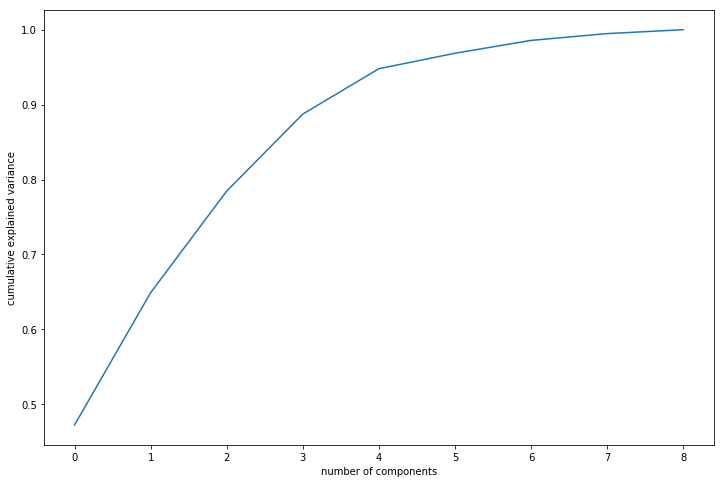

In [33]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the Variance ratios and the Scree Plot we could observe that thaking 5 Principal Components would have an explanation of more than 90%. So we would be taking 5 PCS here.

In [34]:
#Understanding how the original 5 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(country_new.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

Feature       PC1       PC2       PC3       PC4       PC5
0  child_mort -0.429189 -0.041467  0.153658  0.343200 -0.217861
1     exports  0.158228  0.653980 -0.216657  0.306003 -0.082061
2      health  0.221981 -0.200235  0.622099  0.221394  0.587440
3     imports  0.035039  0.694433  0.344880 -0.002784  0.196621
4      income  0.413071 -0.071058 -0.153850  0.456314 -0.136526
5   inflation -0.235281 -0.043130 -0.584212  0.299244  0.685436
6  life_expec  0.433223 -0.071031 -0.184096 -0.212864  0.008728
7   total_fer -0.409241 -0.053249  0.150654  0.408492 -0.184277
8        gdpp  0.398890 -0.182943  0.044015  0.479173 -0.198900

In [35]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [36]:
df_pca = pca_final.fit_transform(country_new)
df_pca.shape

(149, 5)

In [37]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [38]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4],})

Taking number of Prinicpal Components = 5 as derived above, we have derived the New Data Set the Principal Components.

In [39]:
pcs_df2

PC1       PC2       PC3       PC4       PC5
0   -3.198815 -0.876787  1.206813  0.674318  0.132036
1    0.569645 -0.063542 -0.001319 -1.372826  0.196800
2   -0.376155 -0.326198 -1.932621 -0.289537  0.470635
3   -3.680380  0.912204 -1.691035  2.247029 -0.024060
4    1.297002  0.780993  0.085735 -0.630407 -0.453483
5    0.202618 -1.934016 -1.669036  0.119530  1.783479
6   -0.114503 -0.232002 -0.673571 -1.542408  0.098671
7    3.527562 -2.350185  0.046899  1.114993 -0.934315
8    3.999756 -0.399394  0.686126  1.559094 -0.192068
9   -0.178679 -0.245070 -1.598383  0.189709  0.420701
10   1.863803 -0.450866  0.596523  0.005944 -0.623271
11   2.065820  1.102949 -1.344772  1.012520 -0.553560
12  -1.171794 -1.155602 -0.883217 -1.387622 -0.575497
13   1.471737  0.049703  0.563237 -0.665793 -0.221260
14   0.424628  1.304703 -1.176338 -0.294307  1.202423
15   3.902985  1.465479  0.803256  1.940973  0.029058
16   0.199643  1.401385  0.076754 -0.791962 -0.625867
17  -2.882972 -0.439459  0.815145  0.135195 -1.772822
18  -0.358857  1.339408  0.106033 -0.807140  0.029743
19  -0.912079 -0.043445 -0.764281 -0.480564 -0.210393
20   1.333206 -0.214999  1.291574 -1.308847  0.990575
21  -0.971312  0.429472  0.563570  0.625794  0.567548
22   0.577469 -2.302463 -0.222962 -0.706755  0.677433
23   1.122431  0.801386  0.190023 -0.897459 -0.193207
24  -3.369001 -1.093452  0.957409  0.842140 -0.689021
25  -3.110186 -1.466796  1.817649  1.205379  1.226994
26  -0.785038  1.375709  0.388642 -0.591704 -0.346650
27  -2.961745 -0.906835  0.848554  0.314393 -1.498867
28   3.651422 -1.796183  0.548154  1.312917 -0.003305
29  -0.184493  0.803241  0.265498 -1.383721 -0.812338
..        ...       ...       ...       ...       ...
119  2.330245  2.243840  0.707118  0.203185  0.104662
120  2.847162  1.117532  0.738799  0.256985 -0.148818
121 -1.106812  1.771147  1.339018  0.071684  0.852300
122 -1.084491 -0.941520  0.742654  0.318927  0.274512
123  2.464288  0.185211 -0.431785 -0.069674 -0.318199
124  2.948032 -1.641354  0.344929  0.000062 -0.333870
125 -0.797090 -0.964892 -2.766730 -0.865229  1.205292
126  0.047020  0.358883 -0.137119 -1.209467 -0.301001
127 -2.603399 -1.600567 -1.053159  0.644594  0.835670
128  0.282794  0.261544 -0.381587 -0.051342  0.134704
129  3.891569 -0.822157  0.330480  1.658196 -0.668907
130 -1.528823 -0.112292  0.027677 -0.581787  0.758439
131 -2.760740 -1.039294  0.276628  0.323651 -0.264575
132  0.900321  1.836971 -0.854319 -0.911005 -0.491718
133 -2.232596  0.647955  1.733500  0.408048 -0.616459
134 -0.781076 -0.033138  0.552650 -1.163404 -0.283623
135  0.662249  0.932487 -0.112839 -0.937319 -0.038827
136  0.765926 -1.360678 -0.581038 -0.726417  0.055417
137 -0.635396  1.688891 -0.838877 -0.050410 -1.605155
138 -3.043454 -1.355693  1.034804  0.945965  0.409330
139  0.191366  0.607682 -0.614451 -0.614053  1.472713
140  2.899520  1.625736 -2.164338  2.252379 -0.552581
141  3.033383 -1.561574  0.363321  0.744966 -0.371339
142  4.155301 -3.439116  2.149341  2.025933  1.040674
143  1.060697 -1.256441 -0.066905 -0.645284  0.212936
144 -1.048152 -0.613661 -1.315375 -0.505104  1.014533
145 -0.949597  0.905622  0.364345 -0.570835 -0.559713
146  0.129615  2.554652 -0.371954 -0.353504  1.256818
147 -2.329985 -0.555810 -1.645960  0.640561  1.295539
148 -3.263594 -0.350834 -0.162108  1.188844  0.078247

[149 rows x 5 columns]

In [40]:
pcs_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
PC1    149 non-null float64
PC2    149 non-null float64
PC3    149 non-null float64
PC4    149 non-null float64
PC5    149 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


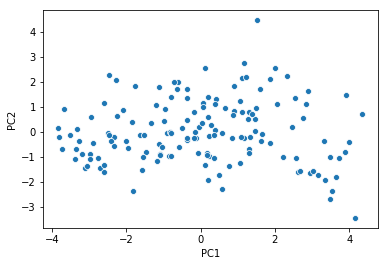

In [41]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

### Clustering

#### Performing K- Mean Clustering 

In [42]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.7144920524662541

Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [44]:
## Assigning the dataframe to a new data frame to perfom the Clustering
dat3_1 = pcs_df2

#### Silhouette Score Analysis

In [45]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

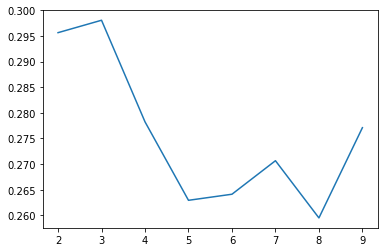

In [46]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

The Silhouette score is the maximum with 3 Clusetrs. Lets have a look at the Elbow Curve and take the final Call.

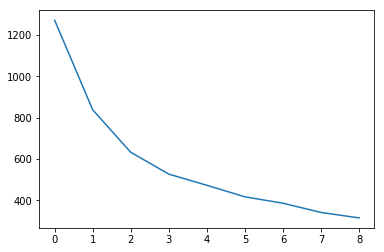

In [47]:
## From the above analysis we find that 3 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

Form the Elbow Curve also we could observe that there is a kink at 3. So we could take that the number of clusters to be equal to 3.

In [48]:
## Performing the KMean using K=3.
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [49]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterID']
dat_km

PC1       PC2       PC3       PC4       PC5  ClusterID
0   -3.198815 -0.876787  1.206813  0.674318  0.132036          2
1    0.569645 -0.063542 -0.001319 -1.372826  0.196800          0
2   -0.376155 -0.326198 -1.932621 -0.289537  0.470635          0
3   -3.680380  0.912204 -1.691035  2.247029 -0.024060          2
4    1.297002  0.780993  0.085735 -0.630407 -0.453483          0
5    0.202618 -1.934016 -1.669036  0.119530  1.783479          0
6   -0.114503 -0.232002 -0.673571 -1.542408  0.098671          0
7    3.527562 -2.350185  0.046899  1.114993 -0.934315          1
8    3.999756 -0.399394  0.686126  1.559094 -0.192068          1
9   -0.178679 -0.245070 -1.598383  0.189709  0.420701          0
10   1.863803 -0.450866  0.596523  0.005944 -0.623271          1
11   2.065820  1.102949 -1.344772  1.012520 -0.553560          1
12  -1.171794 -1.155602 -0.883217 -1.387622 -0.575497          0
13   1.471737  0.049703  0.563237 -0.665793 -0.221260          0
14   0.424628  1.304703 -1.176338 -0.294307  1.202423          0
15   3.902985  1.465479  0.803256  1.940973  0.029058          1
16   0.199643  1.401385  0.076754 -0.791962 -0.625867          0
17  -2.882972 -0.439459  0.815145  0.135195 -1.772822          2
18  -0.358857  1.339408  0.106033 -0.807140  0.029743          0
19  -0.912079 -0.043445 -0.764281 -0.480564 -0.210393          0
20   1.333206 -0.214999  1.291574 -1.308847  0.990575          0
21  -0.971312  0.429472  0.563570  0.625794  0.567548          2
22   0.577469 -2.302463 -0.222962 -0.706755  0.677433          0
23   1.122431  0.801386  0.190023 -0.897459 -0.193207          0
24  -3.369001 -1.093452  0.957409  0.842140 -0.689021          2
25  -3.110186 -1.466796  1.817649  1.205379  1.226994          2
26  -0.785038  1.375709  0.388642 -0.591704 -0.346650          0
27  -2.961745 -0.906835  0.848554  0.314393 -1.498867          2
28   3.651422 -1.796183  0.548154  1.312917 -0.003305          1
29  -0.184493  0.803241  0.265498 -1.383721 -0.812338          0
..        ...       ...       ...       ...       ...        ...
119  2.330245  2.243840  0.707118  0.203185  0.104662          0
120  2.847162  1.117532  0.738799  0.256985 -0.148818          1
121 -1.106812  1.771147  1.339018  0.071684  0.852300          0
122 -1.084491 -0.941520  0.742654  0.318927  0.274512          2
123  2.464288  0.185211 -0.431785 -0.069674 -0.318199          1
124  2.948032 -1.641354  0.344929  0.000062 -0.333870          1
125 -0.797090 -0.964892 -2.766730 -0.865229  1.205292          0
126  0.047020  0.358883 -0.137119 -1.209467 -0.301001          0
127 -2.603399 -1.600567 -1.053159  0.644594  0.835670          2
128  0.282794  0.261544 -0.381587 -0.051342  0.134704          0
129  3.891569 -0.822157  0.330480  1.658196 -0.668907          1
130 -1.528823 -0.112292  0.027677 -0.581787  0.758439          2
131 -2.760740 -1.039294  0.276628  0.323651 -0.264575          2
132  0.900321  1.836971 -0.854319 -0.911005 -0.491718          0
133 -2.232596  0.647955  1.733500  0.408048 -0.616459          2
134 -0.781076 -0.033138  0.552650 -1.163404 -0.283623          0
135  0.662249  0.932487 -0.112839 -0.937319 -0.038827          0
136  0.765926 -1.360678 -0.581038 -0.726417  0.055417          0
137 -0.635396  1.688891 -0.838877 -0.050410 -1.605155          0
138 -3.043454 -1.355693  1.034804  0.945965  0.409330          2
139  0.191366  0.607682 -0.614451 -0.614053  1.472713          0
140  2.899520  1.625736 -2.164338  2.252379 -0.552581          1
141  3.033383 -1.561574  0.363321  0.744966 -0.371339          1
142  4.155301 -3.439116  2.149341  2.025933  1.040674          1
143  1.060697 -1.256441 -0.066905 -0.645284  0.212936          0
144 -1.048152 -0.613661 -1.315375 -0.505104  1.014533          0
145 -0.949597  0.905622  0.364345 -0.570835 -0.559713          0
146  0.129615  2.554652 -0.371954 -0.353504  1.256818          0
147 -2.329985 -0.555810 -1.645960  0.640561  1.295539          2
148 -3.263594 -0.350834 -0.162108  1.188844  

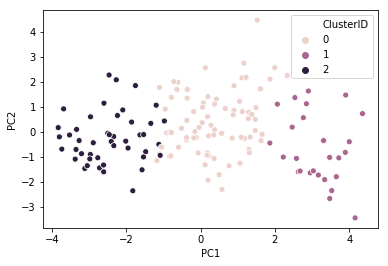

In [50]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',data=dat_km)

In [51]:
## Count of different Clusters.
dat_km['ClusterID'].value_counts()

0    78
2    45
1    26
Name: ClusterID, dtype: int64

In [52]:
## Merging the Original Dat Set with the Clusters.
dat5=pd.merge(country_df,dat_km, left_index=True,right_index=True)


In [53]:
dat5.shape

(149, 16)

In [54]:
dat5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 16 columns):
country       149 non-null object
child_mort    149 non-null float64
exports       149 non-null float64
health        149 non-null float64
imports       149 non-null float64
income        149 non-null int64
inflation     149 non-null float64
life_expec    149 non-null float64
total_fer     149 non-null float64
gdpp          149 non-null int64
PC1           149 non-null float64
PC2           149 non-null float64
PC3           149 non-null float64
PC4           149 non-null float64
PC5           149 non-null float64
ClusterID     149 non-null int32
dtypes: float64(12), int32(1), int64(2), object(1)
memory usage: 19.2+ KB


In [55]:
dat5= dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)

In [56]:
dat5

country  child_mort  exports  health  imports  \
0                       Afghanistan        90.2    10.00    7.58     44.9   
1                           Albania        16.6    28.00    6.55     48.6   
2                           Algeria        27.3    38.40    4.17     31.4   
3                            Angola       119.0    62.30    2.85     42.9   
4               Antigua and Barbuda        10.3    45.50    6.03     58.9   
5                         Argentina        14.5    18.90    8.10     16.0   
6                           Armenia        18.1    20.80    4.40     45.3   
7                         Australia         4.8    19.80    8.73     20.9   
8                           Austria         4.3    51.30   11.00     47.8   
9                        Azerbaijan        39.2    54.30    5.88     20.7   
10                          Bahamas        13.8    35.00    7.89     43.7   
11                          Bahrain         8.6    69.50    4.97     50.9   
12                       Bangladesh        49.4    16.00    3.52     21.8   
13                         Barbados        14.2    39.50    7.97     48.7   
14                          Belarus         5.5    51.40    5.61     64.5   
15                          Belgium         4.5    76.40   10.70     74.7   
16                           Belize        18.8    58.20    5.20     57.5   
17                            Benin       111.0    23.80    4.10     37.2   
18                           Bhutan        42.7    42.50    5.20     70.7   
19                          Bolivia        46.6    41.20    4.84     34.3   
20           Bosnia and Herzegovina         6.9    29.70   11.10     51.3   
21                         Botswana        52.5    43.60    8.30     51.3   
22                           Brazil        19.8    10.70    9.01     11.8   
23                           Brunei        10.5    67.40    2.84     28.0   
24                         Bulgaria        10.8    50.20    6.87     53.0   
25                     Burkina Faso       116.0    19.20    6.74     29.6   
26                          Burundi        93.6     8.92   11.60     39.2   
27                         Cambodia        44.4    54.10    5.68     59.5   
28                         Cameroon       108.0    22.20    5.13     27.0   
29                           Canada         5.6    29.10   11.30     31.0   
..                              ...         ...      ...     ...      ...   
119                            Peru        20.3    27.80    5.08     23.8   
120                     Philippines        31.9    34.80    3.61     36.6   
121                          Poland         6.0    40.10    7.46     42.1   
122                        Portugal         3.9    29.90   11.00     37.4   
123                           Qatar         9.0    62.30    1.81     23.8   
124                         Romania        11.5    32.60    5.58     38.8   
125                          Russia        10.0    29.20    5.08     21.1   
126                          Rwanda        63.6    12.00   10.50     30.0   
127                           Samoa        18.9    29.20    6.47     53.1   
128                    Saudi Arabia        15.7    49.60    4.29     33.0   
129                         Senegal        66.8    24.90    5.66     40.3   
130                          Serbia         7.6    32.90   10.40     47.9   
131                      Seychelles        14.4    93.80    3.40    108.0   
132                    Sierra Leone       160.0    16.80   13.10     34.5   
133                       Singapore         2.8   200.00    3.96    174.0   
134                 Slovak Republic         7.0    76.30    8.79     77.8   
135                        Slovenia         3.2    64.30    9.41     62.9   
136                 Solomon Islands        28.1    49.30    8.55     81.2   
137                    South Africa        53.7    28.60    8.94     27.4   
138                     South Korea         4.1    49.40    6.93     46.2   
139                     

In [57]:
dat5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 11 columns):
country       149 non-null object
child_mort    149 non-null float64
exports       149 non-null float64
health        149 non-null float64
imports       149 non-null float64
income        149 non-null int64
inflation     149 non-null float64
life_expec    149 non-null float64
total_fer     149 non-null float64
gdpp          149 non-null int64
ClusterID     149 non-null int32
dtypes: float64(7), int32(1), int64(2), object(1)
memory usage: 13.4+ KB


Analysing the Clusetrs formed

In [58]:
clu_child_mort = 	pd.DataFrame(dat5.groupby(["ClusterID"]).child_mort.mean())
clu_exports= 	pd.DataFrame(dat5.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat5.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(dat5.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(dat5.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat5.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat5.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(dat5.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat5.groupby(["ClusterID"]).gdpp.mean())

In [59]:
df = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [60]:
df.columns = ["ClusterID","child_mort","exports","health","imports",'income','inflation','life_expec','total_fer','gdpp']
df

ClusterID  child_mort    exports    health    imports        income  \
0          0   37.050000  40.620628  6.826282  47.646999  17699.794872   
1          1   38.188462  38.361154  6.762308  41.411538  22334.615385   
2          2   41.551111  45.395556  6.722222  51.271111  14442.200000   

   inflation  life_expec  total_fer          gdpp  
0   7.239205   70.388462   2.817692  13779.602564  
1   7.012615   71.326923   3.033077  17890.076923  
2   7.759111   70.586667   3.018222   9743.333333

#### Hierarchical Clustering 

In [63]:
datt_10=pcs_df2

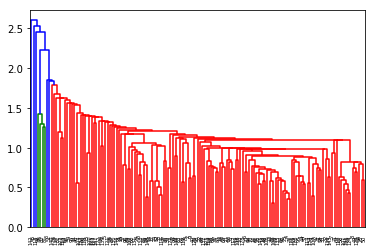

In [64]:
# heirarchical clustering
mergings = linkage(datt_10, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

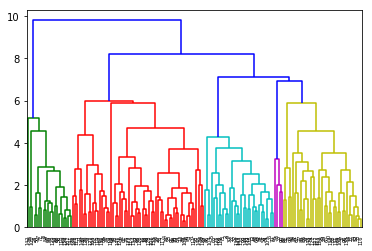

In [65]:
mergings = linkage(datt_10, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [66]:
country_hc_dat=country1

In [67]:
country_hc_dat=country_hc_dat.drop(['country'],axis=1)
country_hc_dat

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2    10.00    7.58     44.9    1610      9.440        56.2   
1          16.6    28.00    6.55     48.6    9930      4.490        76.3   
2          27.3    38.40    4.17     31.4   12900     16.100        76.5   
3         119.0    62.30    2.85     42.9    5900     22.400        60.1   
4          10.3    45.50    6.03     58.9   19100      1.440        76.8   
5          14.5    18.90    8.10     16.0   18700     20.900        75.8   
6          18.1    20.80    4.40     45.3    6700      7.770        73.3   
7           4.8    19.80    8.73     20.9   41400      1.160        82.0   
8           4.3    51.30   11.00     47.8   43200      0.873        80.5   
9          39.2    54.30    5.88     20.7   16000     13.800        69.1   
10         13.8    35.00    7.89     43.7   22900     -0.393        73.8   
11          8.6    69.50    4.97     50.9   41100      7.440        76.0   
12         49.4    16.00    3.52     21.8    2440      7.140        70.4   
13         14.2    39.50    7.97     48.7   15300      0.321        76.7   
14          5.5    51.40    5.61     64.5   16200     15.100        70.4   
15          4.5    76.40   10.70     74.7   41100      1.880        80.0   
16         18.8    58.20    5.20     57.5    7880      1.140        71.4   
17        111.0    23.80    4.10     37.2    1820      0.885        61.8   
18         42.7    42.50    5.20     70.7    6420      5.990        72.1   
19         46.6    41.20    4.84     34.3    5410      8.780        71.6   
20          6.9    29.70   11.10     51.3    9720      1.400        76.8   
21         52.5    43.60    8.30     51.3   13300      8.920        57.1   
22         19.8    10.70    9.01     11.8   14500      8.410        74.2   
24         10.8    50.20    6.87     53.0   15300      1.110        73.9   
25        116.0    19.20    6.74     29.6    1430      6.810        57.9   
26         93.6     8.92   11.60     39.2     764     12.300        57.7   
27         44.4    54.10    5.68     59.5    2520      3.120        66.1   
28        108.0    22.20    5.13     27.0    2660      1.910        57.3   
29          5.6    29.10   11.30     31.0   40700      2.870        81.3   
30         26.5    32.70    4.09     61.8    5830      0.505        72.5   
..          ...      ...     ...      ...     ...        ...         ...   
134         7.0    76.30    8.79     77.8   25200      0.485        75.5   
135         3.2    64.30    9.41     62.9   28700     -0.987        79.5   
136        28.1    49.30    8.55     81.2    1780      6.810        61.7   
137        53.7    28.60    8.94     27.4   12000      6.350        54.3   
138         4.1    49.40    6.93     46.2   30400      3.160        80.1   
139         3.8    25.50    9.54     26.8   32500      0.160        81.9   
140        11.2    19.60    2.94     26.8    8560     22.800        74.4   
141        20.7    26.90    4.47     57.1    9920      4.440        71.6   
142        76.7    19.70    6.32     17.2    3370     19.600        66.3   
143        24.1    52.50    7.01     38.4   14200      7.200        70.3   
144         3.0    46.20    9.63     40.7   42900      0.991        81.5   
146        52.4    14.90    5.98     58.6    2110     12.500        69.6   
147        71.9    18.70    6.01     29.1    2090      9.250        59.3   
148        14.9    66.50    3.88     60.8   13500      4.080        76.6   
150        90.3    40.20    7.65     57.3    1210      1.180        58.7   
151        17.4    12.40    5.07     60.3    4980      3.680        69.9   
152        17.4    50.50    6.21     55.3   10400      3.820        76.9   
153        19.1    20.40    6.74     25.5   18000      7.010        78.2   
154        62.0    76.30    2.50     44.5    9940      2.310        67.9   
155        81.0    17.10    9.01     28.6    1540     10.600        56.8   
156        11.7    47.10    7.72     51.1    7820    

In [68]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
country_hc = pd.concat([country_hc_dat, clusterCut], axis=1)
country_hc.columns = ["child_mort","exports","health","imports",'income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

In [69]:
country_hc.head()

child_mort  exports  health  imports   income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9   1610.0       9.44        56.2   
1        16.6     28.0    6.55     48.6   9930.0       4.49        76.3   
2        27.3     38.4    4.17     31.4  12900.0      16.10        76.5   
3       119.0     62.3    2.85     42.9   5900.0      22.40        60.1   
4        10.3     45.5    6.03     58.9  19100.0       1.44        76.8   

   total_fer     gdpp  ClusterID  
0       5.82    553.0        0.0  
1       1.65   4090.0        1.0  
2       2.89   4460.0        0.0  
3       6.16   3530.0        0.0  
4       2.13  12200.0        1.0

In [70]:
clu_child_mort = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).child_mort.mean())
clu_exports= 	pd.DataFrame(country_hc.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).gdpp.mean())

In [71]:
df_hc = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [72]:
df_hc.columns = ["ClusterID","child_mort","exports","health","imports",'income','inflation','life_expec','total_fer','gdpp']

In [73]:
df_hc

ClusterID  child_mort    exports    health    imports        income  \
0          0   37.159375  38.381391  6.582813  44.552592  13596.453125   
1          1   34.318367  38.581633  6.835102  48.597959  13417.591837   
2          2   40.550000  36.369500  7.314500  43.015000  19237.500000   

   inflation  life_expec  total_fer          gdpp  
0   6.130641   70.725000   2.853438   9453.031250  
1   7.184816   70.528571   2.924490   8578.387755  
2   6.446400   70.945000   3.104000  17989.100000

In [74]:
## Getting the Clusters derived from K-Mean
df

ClusterID  child_mort    exports    health    imports        income  \
0          0   37.050000  40.620628  6.826282  47.646999  17699.794872   
1          1   38.188462  38.361154  6.762308  41.411538  22334.615385   
2          2   41.551111  45.395556  6.722222  51.271111  14442.200000   

   inflation  life_expec  total_fer          gdpp  
0   7.239205   70.388462   2.817692  13779.602564  
1   7.012615   71.326923   3.033077  17890.076923  
2   7.759111   70.586667   3.018222   9743.333333

In [75]:
df_final=df

Here in order to understand the Economic Factor of Trade we have to look at the difference between the Imports and the Exports of the countries which is denoted by the Trade Deficit. Having a high Trade Deficit is sign of a weaker economy.
So to understand this, we will add a value of Trade Deficit to each of the clusters.

In [76]:
## Claculating the Trade Defict
df_final['trade_deficit']=df_final.imports-df_final.exports

In [77]:
df_final

ClusterID  child_mort    exports    health    imports        income  \
0          0   37.050000  40.620628  6.826282  47.646999  17699.794872   
1          1   38.188462  38.361154  6.762308  41.411538  22334.615385   
2          2   41.551111  45.395556  6.722222  51.271111  14442.200000   

   inflation  life_expec  total_fer          gdpp  trade_deficit  
0   7.239205   70.388462   2.817692  13779.602564       7.026371  
1   7.012615   71.326923   3.033077  17890.076923       3.050385  
2   7.759111   70.586667   3.018222   9743.333333       5.875556

### Analysis of the Clusters 

We would analyze the cluster values of each of the variables and will try to find out how they vary.<br>
We would plot the values of different variables vs the different clusters to see how the variables behave across different Clusters. 

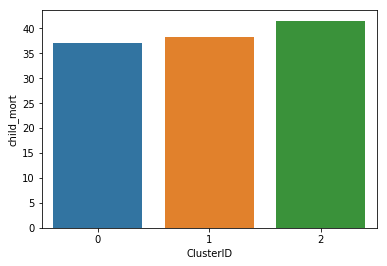

In [78]:
## Chiled Mortality Rate across different Clusters

sns.barplot(x=df.ClusterID, y=df.child_mort)

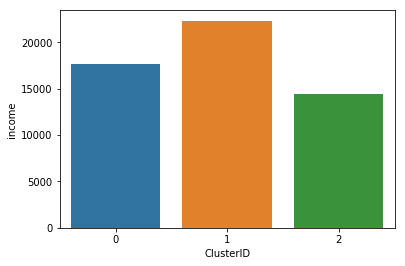

In [79]:
## Income across different Clusters 

sns.barplot(x=df.ClusterID, y=df.income)

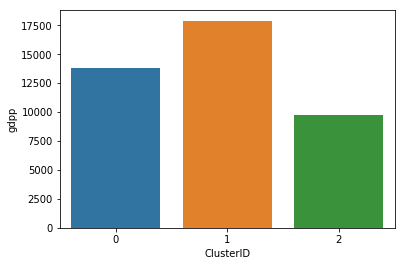

In [80]:
## GDPP value across different Clusters 

sns.barplot(x=df.ClusterID, y=df.gdpp)

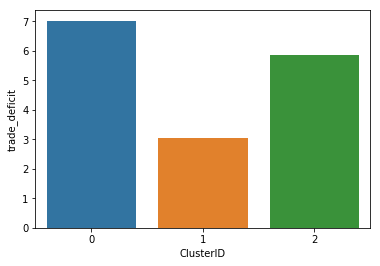

In [81]:
## Trade Deficit Values across different Clusters 

sns.barplot(x=df_final.ClusterID, y=df.trade_deficit)

### Analysis of the Clusters

Analysing the three different Clusters across the different Varibales(GDPP, Child Mortality etc..)<br>

1.**Child Mortality:**<br>
   >**Cluster-2** countries has the **highest** Child Mortality rate.<br>
   >**Cluster-1** countries has the **comparatievely low** Child Mortality Rate.<br>
   
2.**Income:**<br>   
   >**Cluster-1** countries has **highest Income.**<br>
   >**Cluster-2** countries has the **lowest Income.**<br>
   
3.**GDPP**<br>   
   >**Cluster-1** countries has **highest** GDPP.<br>
   >**Cluster-2** countries has the **lowset** GDPP.<br>
   
4.**Trade Deficit**<br>
   >**Cluster-1** countries has **lowest** Trade Deficit.<br>
   >**Cluster-2** countries has **pretty high** Trade Deficit.<br>
   
#### Cluster Analysis Conclusion:<br>
From all these we can conclude that **Cluster-1** represent the **Developed Countries**, while **Cluster-2** represents the **Under Developed** countries.<br>
This implies that countries in the **Cluster-2 are in need of the aid.**

### Cluster Visualization

Plotting the Scatter Plot of the two Principal Components 'PC1' and 'PC2' and differentiating the Clusters.

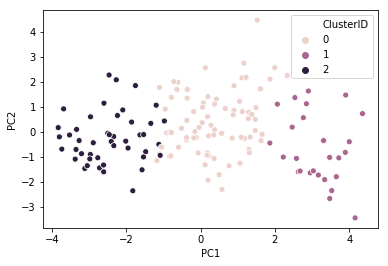

In [82]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',data=dat_km)

Plotting scatter plot between the two **original variable** which are **'child_mort'** and **'income'** 

In [83]:
country_100= pd.merge(country_new,dat_km, left_index=True,right_index=True)

In [84]:
country_100

child_mort   exports    health   imports    income  inflation  \
0      1.542766 -1.438366  0.285659 -0.030907 -0.962316   0.431806   
1     -0.569365 -0.522091 -0.100631  0.163236 -0.336458  -0.360045   
2     -0.262302  0.007311 -0.993226 -0.739269 -0.113045   1.497206   
3      2.369252  1.223920 -1.488278 -0.135850 -0.639608   2.505017   
4     -0.750158  0.368731 -0.295652  0.703690  0.353340  -0.847953   
5     -0.629629 -0.985319  0.480680 -1.547325  0.323251   2.265062   
6     -0.526319 -0.888601 -0.906967 -0.009919 -0.579429   0.164656   
7     -0.907994 -0.939505  0.716955 -1.290216  2.030821  -0.892745   
8     -0.922343  0.663975  1.568295  0.121259  2.166223  -0.938656   
9      0.079197  0.816687 -0.351908 -1.300711  0.120148   1.129275   
10    -0.649717 -0.165763  0.401922 -0.093873  0.639189  -1.141178   
11    -0.798944  1.590430 -0.693194  0.283920  2.008254   0.111866   
12     0.371911 -1.132941 -1.237001 -1.242992 -0.899881   0.063875   
13    -0.638238  0.063306  0.431925  0.168483  0.067492  -1.026960   
14    -0.887906  0.669065 -0.453169  0.997528  0.135193   1.337236   
15    -0.916604  1.941668  1.455783  1.532735  2.008254  -0.777567   
16    -0.506230  1.015213 -0.606935  0.630230 -0.490666  -0.895944   
17     2.139672 -0.735889 -1.019478 -0.434936 -0.946519  -0.936737   
18     0.179638  0.216018 -0.606935  1.322850 -0.600492  -0.120090   
19     0.291558  0.149843 -0.741949 -0.587102 -0.676467   0.326226   
20    -0.847730 -0.435554  1.605799  0.304908 -0.352255  -0.854352   
21     0.460873  0.272013  0.555688  0.304908 -0.082955   0.348622   
22    -0.477533 -1.402733  0.821966 -1.767704  0.007313   0.267037   
23    -0.735810  0.607980  0.019381  0.394110  0.067492  -0.900743   
24     2.283160 -0.970048 -0.029374 -0.833717 -0.975856   0.011085   
25     1.640337 -1.493342  1.793318 -0.329993 -1.025955   0.889320   
26     0.228424  0.806506 -0.426916  0.735172 -0.893863  -0.579204   
27     2.053580 -0.817335 -0.633188 -0.970142 -0.883332  -0.772768   
28    -0.885036 -0.466097  1.680807 -0.760257  1.978165  -0.619196   
29    -0.285260 -0.282842 -1.023229  0.855856 -0.644874  -0.997525   
..          ...       ...       ...       ...       ...        ...   
119   -0.844860  1.936578  0.739457  1.695395  0.812203  -1.000725   
120   -0.953910  1.325728  0.971982  0.913574  1.075484  -1.236200   
121   -0.239344  0.562166  0.649448  1.873798 -0.949528   0.011085   
122    0.495310 -0.491549  0.795713 -0.949153 -0.180746  -0.062501   
123   -0.928082  0.567257  0.041884  0.037305  1.203364  -0.572805   
124   -0.936692 -0.649352  1.020737 -0.980636  1.361333  -1.052715   
125   -0.724331 -0.949686 -1.454524 -0.980636 -0.439514   2.569004   
126   -0.451705 -0.578086 -0.880714  0.609241 -0.337210  -0.368044   
127    1.155351 -0.944596 -0.186891 -1.484360 -0.829923   2.057101   
128   -0.354134  0.725059  0.071887 -0.371970 -0.015254   0.073473   
129   -0.959650  0.404364  1.054491 -0.251286  2.143656  -0.919780   
130    0.458003 -1.188935 -0.314404  0.687948 -0.924705   0.921314   
131    1.017603 -0.995500 -0.303153 -0.859952 -0.926209   0.401412   
132   -0.618150  1.437717 -1.101987  0.803385 -0.067911  -0.425633   
133    1.545636  0.098939  0.311912  0.619736 -0.992406  -0.889546   
134   -0.546407 -1.316196 -0.655690  0.777149 -0.708814  -0.489621   
135   -0.546407  0.623251 -0.228145  0.514793 -0.301103  -0.467225   
136   -0.497621 -0.908963 -0.029374 -1.048849  0.270595   0.043079   
137    0.733499  1.936578 -1.619542 -0.051896 -0.335706  -0.708780   
138    1.278750 -1.076946  0.821966 -0.886188 -0.967582   0.617371   
139   -0.709982  0.450177  0.338165  0.294414 -0.495179   1.065287   
140   -0.798944  2.007843 -1.184496  0.950304  3.249439   0.921314   
141   -0.896515 -0.511911  1.058241 -0.770751  1.639660  -0.827157   
142   -0.836251 -1.316196  4.156068 -1.557819  2.632608  -0.883147   
143   -0.741549 -0.608628  0.574440 -1.054096  0.202894  -0.292858   
144   -0.004025

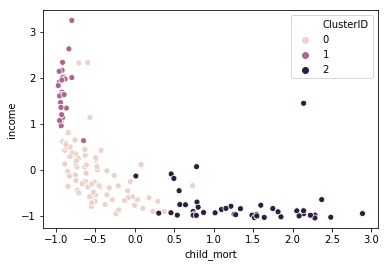

In [118]:
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=country_100)

Here in the scatter plot also we can verify our claim that<br> 
Cluster-2 countries (which we said earlier as Underdeveloped) are high on Child Mortality and low on Income.<br>
Cluster-1 countries which we claim to be Developed Countries are high on Income and low on Child Mortality.

In [86]:
country_df

country  child_mort  exports  health  imports  \
0                       Afghanistan        90.2    10.00    7.58     44.9   
1                           Albania        16.6    28.00    6.55     48.6   
2                           Algeria        27.3    38.40    4.17     31.4   
3                            Angola       119.0    62.30    2.85     42.9   
4               Antigua and Barbuda        10.3    45.50    6.03     58.9   
5                         Argentina        14.5    18.90    8.10     16.0   
6                           Armenia        18.1    20.80    4.40     45.3   
7                         Australia         4.8    19.80    8.73     20.9   
8                           Austria         4.3    51.30   11.00     47.8   
9                        Azerbaijan        39.2    54.30    5.88     20.7   
10                          Bahamas        13.8    35.00    7.89     43.7   
11                          Bahrain         8.6    69.50    4.97     50.9   
12                       Bangladesh        49.4    16.00    3.52     21.8   
13                         Barbados        14.2    39.50    7.97     48.7   
14                          Belarus         5.5    51.40    5.61     64.5   
15                          Belgium         4.5    76.40   10.70     74.7   
16                           Belize        18.8    58.20    5.20     57.5   
17                            Benin       111.0    23.80    4.10     37.2   
18                           Bhutan        42.7    42.50    5.20     70.7   
19                          Bolivia        46.6    41.20    4.84     34.3   
20           Bosnia and Herzegovina         6.9    29.70   11.10     51.3   
21                         Botswana        52.5    43.60    8.30     51.3   
22                           Brazil        19.8    10.70    9.01     11.8   
23                           Brunei        10.5    67.40    2.84     28.0   
24                         Bulgaria        10.8    50.20    6.87     53.0   
25                     Burkina Faso       116.0    19.20    6.74     29.6   
26                          Burundi        93.6     8.92   11.60     39.2   
27                         Cambodia        44.4    54.10    5.68     59.5   
28                         Cameroon       108.0    22.20    5.13     27.0   
29                           Canada         5.6    29.10   11.30     31.0   
..                              ...         ...      ...     ...      ...   
137                    South Africa        53.7    28.60    8.94     27.4   
138                     South Korea         4.1    49.40    6.93     46.2   
139                           Spain         3.8    25.50    9.54     26.8   
140                       Sri Lanka        11.2    19.60    2.94     26.8   
141  St. Vincent and the Grenadines        20.7    26.90    4.47     57.1   
142                           Sudan        76.7    19.70    6.32     17.2   
143                        Suriname        24.1    52.50    7.01     38.4   
144                          Sweden         3.0    46.20    9.63     40.7   
145                     Switzerland         4.5    64.00   11.50     53.3   
146                      Tajikistan        52.4    14.90    5.98     58.6   
147                        Tanzania        71.9    18.70    6.01     29.1   
148                        Thailand        14.9    66.50    3.88     60.8   
149                     Timor-Leste        62.6     2.20    9.12     27.8   
150                            Togo        90.3    40.20    7.65     57.3   
151                           Tonga        17.4    12.40    5.07     60.3   
152                         Tunisia        17.4    50.50    6.21     55.3   
153                          Turkey        19.1    20.40    6.74     25.5   
154                    Turkmenistan        62.0    76.30    2.50     44.5   
155                          Uganda        81.0    17.10    9.01     28.6   
156                         Ukraine        11.7    47.10    7.72     51.1   
157            United Ar

In [87]:
df_final

ClusterID  child_mort    exports    health    imports        income  \
0          0   37.050000  40.620628  6.826282  47.646999  17699.794872   
1          1   38.188462  38.361154  6.762308  41.411538  22334.615385   
2          2   41.551111  45.395556  6.722222  51.271111  14442.200000   

   inflation  life_expec  total_fer          gdpp  trade_deficit  
0   7.239205   70.388462   2.817692  13779.602564       7.026371  
1   7.012615   71.326923   3.033077  17890.076923       3.050385  
2   7.759111   70.586667   3.018222   9743.333333       5.875556

In [88]:
country_child_mort=country_df[['country','child_mort']]

In [89]:
country_child_mort=country_child_mort[country_child_mort.child_mort>=41.55]

In [90]:
country_child_mort.shape

(55, 2)

In [91]:
country_gdpp=country_df[['country','gdpp']]

In [92]:
country_gdpp=country_gdpp[country_gdpp.gdpp<=9743.33]

In [93]:
country_gdpp.shape

(110, 2)

In [94]:
country_infllation=country_df[['country','inflation']]

In [95]:
country_infllation=country_infllation[country_infllation.inflation>=7.75]

In [96]:
country_infllation.shape

(58, 2)

In [97]:
country_income=country_df[['country','income']]
country_income=country_income[country_income.income<=14442.20]
country_income.shape

(99, 2)

In [98]:
country_heealth=country_df[['country','health']]
country_heealth=country_heealth[country_heealth.health<=6.72]
country_heealth.shape

(89, 2)

In [99]:
country_trade_deficit=country_df[['country','imports','exports']]
country_trade_deficit['TradeDeficit']=country_trade_deficit.imports-country_trade_deficit.exports

C:\Users\156638\AppData\Local\Continuum\anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
country_trade_deficit=country_trade_deficit[country_trade_deficit['TradeDeficit']>6.00]
country_trade_deficit.shape

(77, 4)

In [101]:
## List of New Data Frames:

country_child_mort.shape

(55, 2)

In [102]:
country_gdpp.shape

(110, 2)

In [103]:
country_infllation.shape

(58, 2)

In [104]:
country_income.shape

(99, 2)

In [105]:
country_heealth.shape

(89, 2)

In [106]:
country_trade_deficit.shape

(77, 4)

In [107]:
df_11=pd.merge(country_gdpp,country_income,how='inner',on='country')

In [108]:
df_11.shape

(99, 3)

In [109]:
df_12=pd.merge(df_11,country_heealth,how='inner',on='country')

In [110]:
df_12.shape

(64, 4)

In [111]:
df_13=pd.merge(df_12,country_trade_deficit,how='inner',on='country')

In [112]:
df_13.shape

(37, 7)

In [113]:
df_14=pd.merge(country_infllation,df_13,how='inner',on='country')

In [114]:
df_14.shape

(15, 8)

In [115]:
df_15=pd.merge(country_child_mort,df_14,how='inner',on='country')

In [116]:
df_15.shape

(10, 9)

In [117]:
df_15

country  child_mort  inflation  gdpp  income  health  imports  exports  \
0     Eritrea        55.2      11.60   482    1420    2.66     23.3     4.79   
1       Ghana        74.7      16.60  1310    3060    5.22     45.9    29.50   
2      Guinea       109.0      16.10   648    1190    4.93     43.2    30.30   
3         Lao        78.9       9.20  1140    3980    4.47     49.3    35.40   
4  Madagascar        62.2       8.79   413    1390    3.77     43.0    25.00   
5      Malawi        90.5      12.10   459    1030    6.59     34.9    22.80   
6  Mauritania        97.4      18.90  1200    3320    4.41     61.2    50.70   
7       Nepal        47.0      15.10   592    1990    5.25     36.4     9.58   
8  Tajikistan        52.4      12.50   738    2110    5.98     58.6    14.90   
9    Tanzania        71.9       9.25   702    2090    6.01     29.1    18.70   

   TradeDeficit  
0         18.51  
1         16.40  
2         12.90  
3         13.90  
4         18.00  
5         12.10  
6         10.50  
7         26.82  
8         43.70  
9         10.40

So finally we have got the list of 10 countries that are in direst need of aid.<be>

For these Countries we could observe the following:<be>
>1.They have the highest Child Mortality Rate.<br>
>2.They have inflation in the double digit range.<br>
>3.They have very low GDPP rate.<br>
>4.They have very low income.<br>
>5.Their spendings on Health is also very low.

10 Countreis that are in direst need of aids are:<br>

1.**Eritrea.**<br>
2.**Ghana**<br>
3.**Guinea**<br>
4.**Lao**<br>
5.**Madagascar**<br>
6.**Malawi**<br>
7.**Mauritania**<br>
8.**Nepal**<br>
9.**Tajikistan**<br>
10.**Tanzania**